<a href="https://www.kaggle.com/code/sunyyyy07/spam-mail-prediction-96-accuracy?scriptVersionId=191707592" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mail-dataset/mail_data.csv


# Importing Dependencies

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib .pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
raw_mail_data= pd.read_csv('/kaggle/input/spam-mail-dataset/mail_data.csv')

In [4]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
#replace the null values with a null string 
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
mail_data.shape

(5572, 2)

# Check Imbalanced Data 

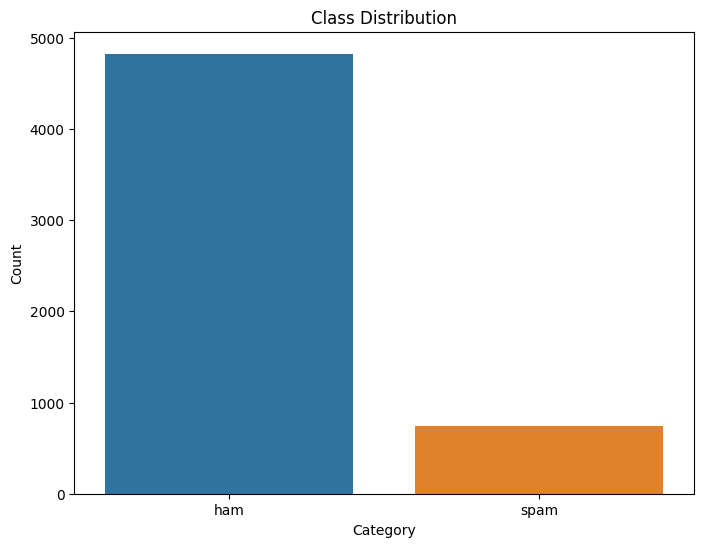

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=mail_data)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [10]:
spam_messages = ' '.join(mail_data[mail_data['Category'] == 'spam']['Message'])
ham_messages = ' '.join(mail_data[mail_data['Category'] == 'ham']['Message'])

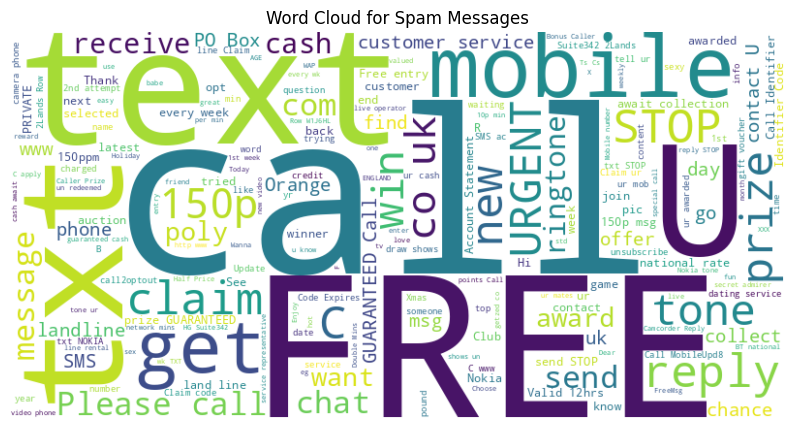

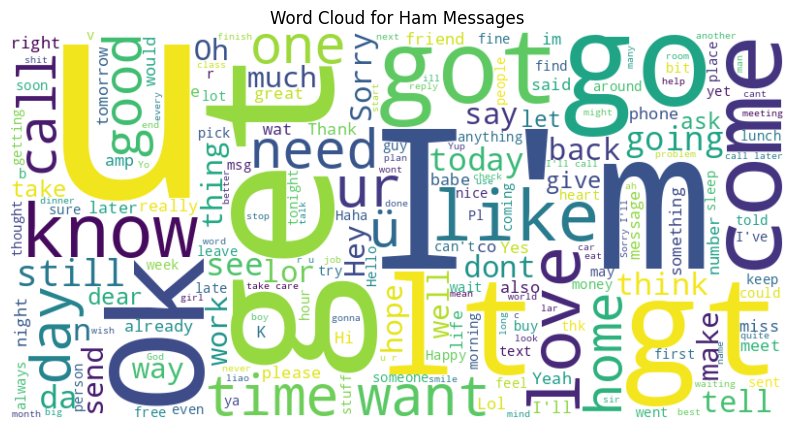

In [11]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
generate_wordcloud(spam_messages, 'Word Cloud for Spam Messages')

# Generating word cloud for 'ham' messages
generate_wordcloud(ham_messages, 'Word Cloud for Ham Messages')

# Label Encoding

In [12]:
# label spam mails  as 0 : haim mail as 1 :
mail_data.loc[mail_data['Category']== 'spam' , 'Category', ] = 0
mail_data.loc[mail_data['Category']== 'ham' , 'Category', ] = 1


SPAM - 0

HAM - 1

In [13]:
# separating the data as texts and labels 
X = mail_data['Message']
Y = mail_data['Category']

In [14]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [15]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [16]:
#splitting the training data and test data 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,test_size =0.2 , random_state = 3)


In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# Feature Extraction

In [18]:
# transform the text data to feature vectors that can be used as input to the Logistic Regression
feature_extraction  = TfidfVectorizer(min_df = 1 , stop_words = 'english' , lowercase=True)

In [19]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [20]:
# convert Y_train and Y_test values as integers 
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [21]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

# Training the Model

In [22]:
model = LogisticRegression()

In [23]:
#training the LOGISTIC REGRESSION model with training data
model.fit(X_train_features , Y_train) 

LogisticRegression()

# Evaluating the trained model

In [24]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train , prediction_on_training_data)
print('Accuracy score on training data is ->' ,accuracy_on_training_data*100 )


Accuracy score on training data is -> 96.70181736594121


In [25]:
# prediction on test data
prediction_on_testing_data = model.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test , prediction_on_testing_data)
print('Accuracy score on testing data is ->' ,accuracy_on_testing_data*100,"%" )


Accuracy score on testing data is -> 96.59192825112108 %


# Building a predictive system

In [26]:
input_mail = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

In [27]:
#convert text to feature vector
input_data_features = feature_extraction.transform(input_mail)

In [28]:
#making prediction
prediction = model.predict(input_data_features )

if(prediction==1):
    print("Ham mail")
else :
    print("Spam Mail")


Ham mail
